In [1]:
import dataframeWithMetadata as dfmd
import dataAgglomeration as da
import os
from matplotlib import pyplot as plt
import pandas as pd
from matplotlib import rcParams
rcParams["figure.dpi"] = 400

In [2]:
def plot_density_ratio_dframe(dframe):
    """Plots the temporal evolution of the L-INFINITY velocity error norm for each mesh resolution and density ratio."""
    
    timeSchemes = dframe.index.get_level_values("timeSchemes").unique()
    fluxSchemes = dframe.index.get_level_values("fluxSchemes").unique()
    if len(fluxSchemes) >1:
        fluxSchemes = ["upwind", "cubic","limitedLinearV","linear","LUST","MUSCL", "QUICK", "SuperBee", "vanLeer"]
    resolutions = dframe.index.get_level_values("resolution").unique()
    v = 0.01
    
    for resolution in resolutions:
        for timeScheme in timeSchemes:
            for fluxScheme in fluxSchemes:
                if (timeScheme == "Euler") | ((timeScheme == "CrankNicolson") & (fluxScheme == "upwind")):
                    df_subset = dframe.loc[resolution,fluxScheme,timeScheme]
                    plt.plot(df_subset["time"], df_subset["LinfU"] / v, 
                         label=" %s+%s;N%s" % (timeScheme, fluxScheme, resolution))
    plt.ylabel(r"$L_{\infty}(\frac{\|\mathbf{v}_c^e - \mathbf{v}_c^n\|}{\|\mathbf{v}_c^e\|})$")#"$L_{\infty}(\|\mathbf{v}_c^e - \mathbf{v}_c^n\|)$")
    plt.xlabel("Time in seconds")
    plt.yscale('log')
    if dframe["LinfU"].max() > 1e3:
        plt.ylim(bottom=1e-13,top=1e3)
    plt.xlim(-0.005,0.155)
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=True, ncol=2)

In [9]:
agglomerator = da.data_agglomerator("mercuryAirDropletTranslation.parameter","LinfU.dat", 
                                     directory_pattern="isoAdv-mercuryAirDropletTranslation_00000_templateCase")
agglomerator.show_failed_variations()
agglomerator.write_agglomerated_study_data("isoAdv-mercuryAirDropletTranslation.csv")
dframe_isoAdv = agglomerator.study_dataframe()
dframe_isoAdv = dframe_isoAdv.sort_index()

agglomerator = da.data_agglomerator("mercuryAirDropletTranslation.parameter","LinfU.dat", 
                                     directory_pattern="isoRho-mercuryAirDropletTranslation_00000_templateCase")
agglomerator.show_failed_variations()
agglomerator.write_agglomerated_study_data("isoRho-mercuryAirDropletTranslation.csv")
dframe_isoRho = agglomerator.study_dataframe()
dframe_isoRho = dframe_isoRho.sort_index()

Variants without valid data:
----------------------------
#Variation | Reason
----------------------------
27 	 No data file
28 	 No data file
30 	 No data file
[['boundary_R0p5_H2_C0p50p5.stl'], [0.000250001], [0.00050007], [0.0006250003], [0.0006250001], [0.1], [0.2], [16, 32, 64], ['LUST', 'MUSCL', 'QUICK', 'SuperBee', 'cubic', 'limitedLinearV', 'linear', 'upwind', 'vanLeer'], ['CrankNicolson', 'Euler'], [0.01], [0.0], [0.0], [1.1839], [0.0], [13533.6], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]]
['surface_file', 'radius', 'z_centre', 'y_centre', 'x_centre', 'end_time', 'CFL_num', 'resolution', 'fluxSchemes', 'timeSchemes', 'z_velocity'

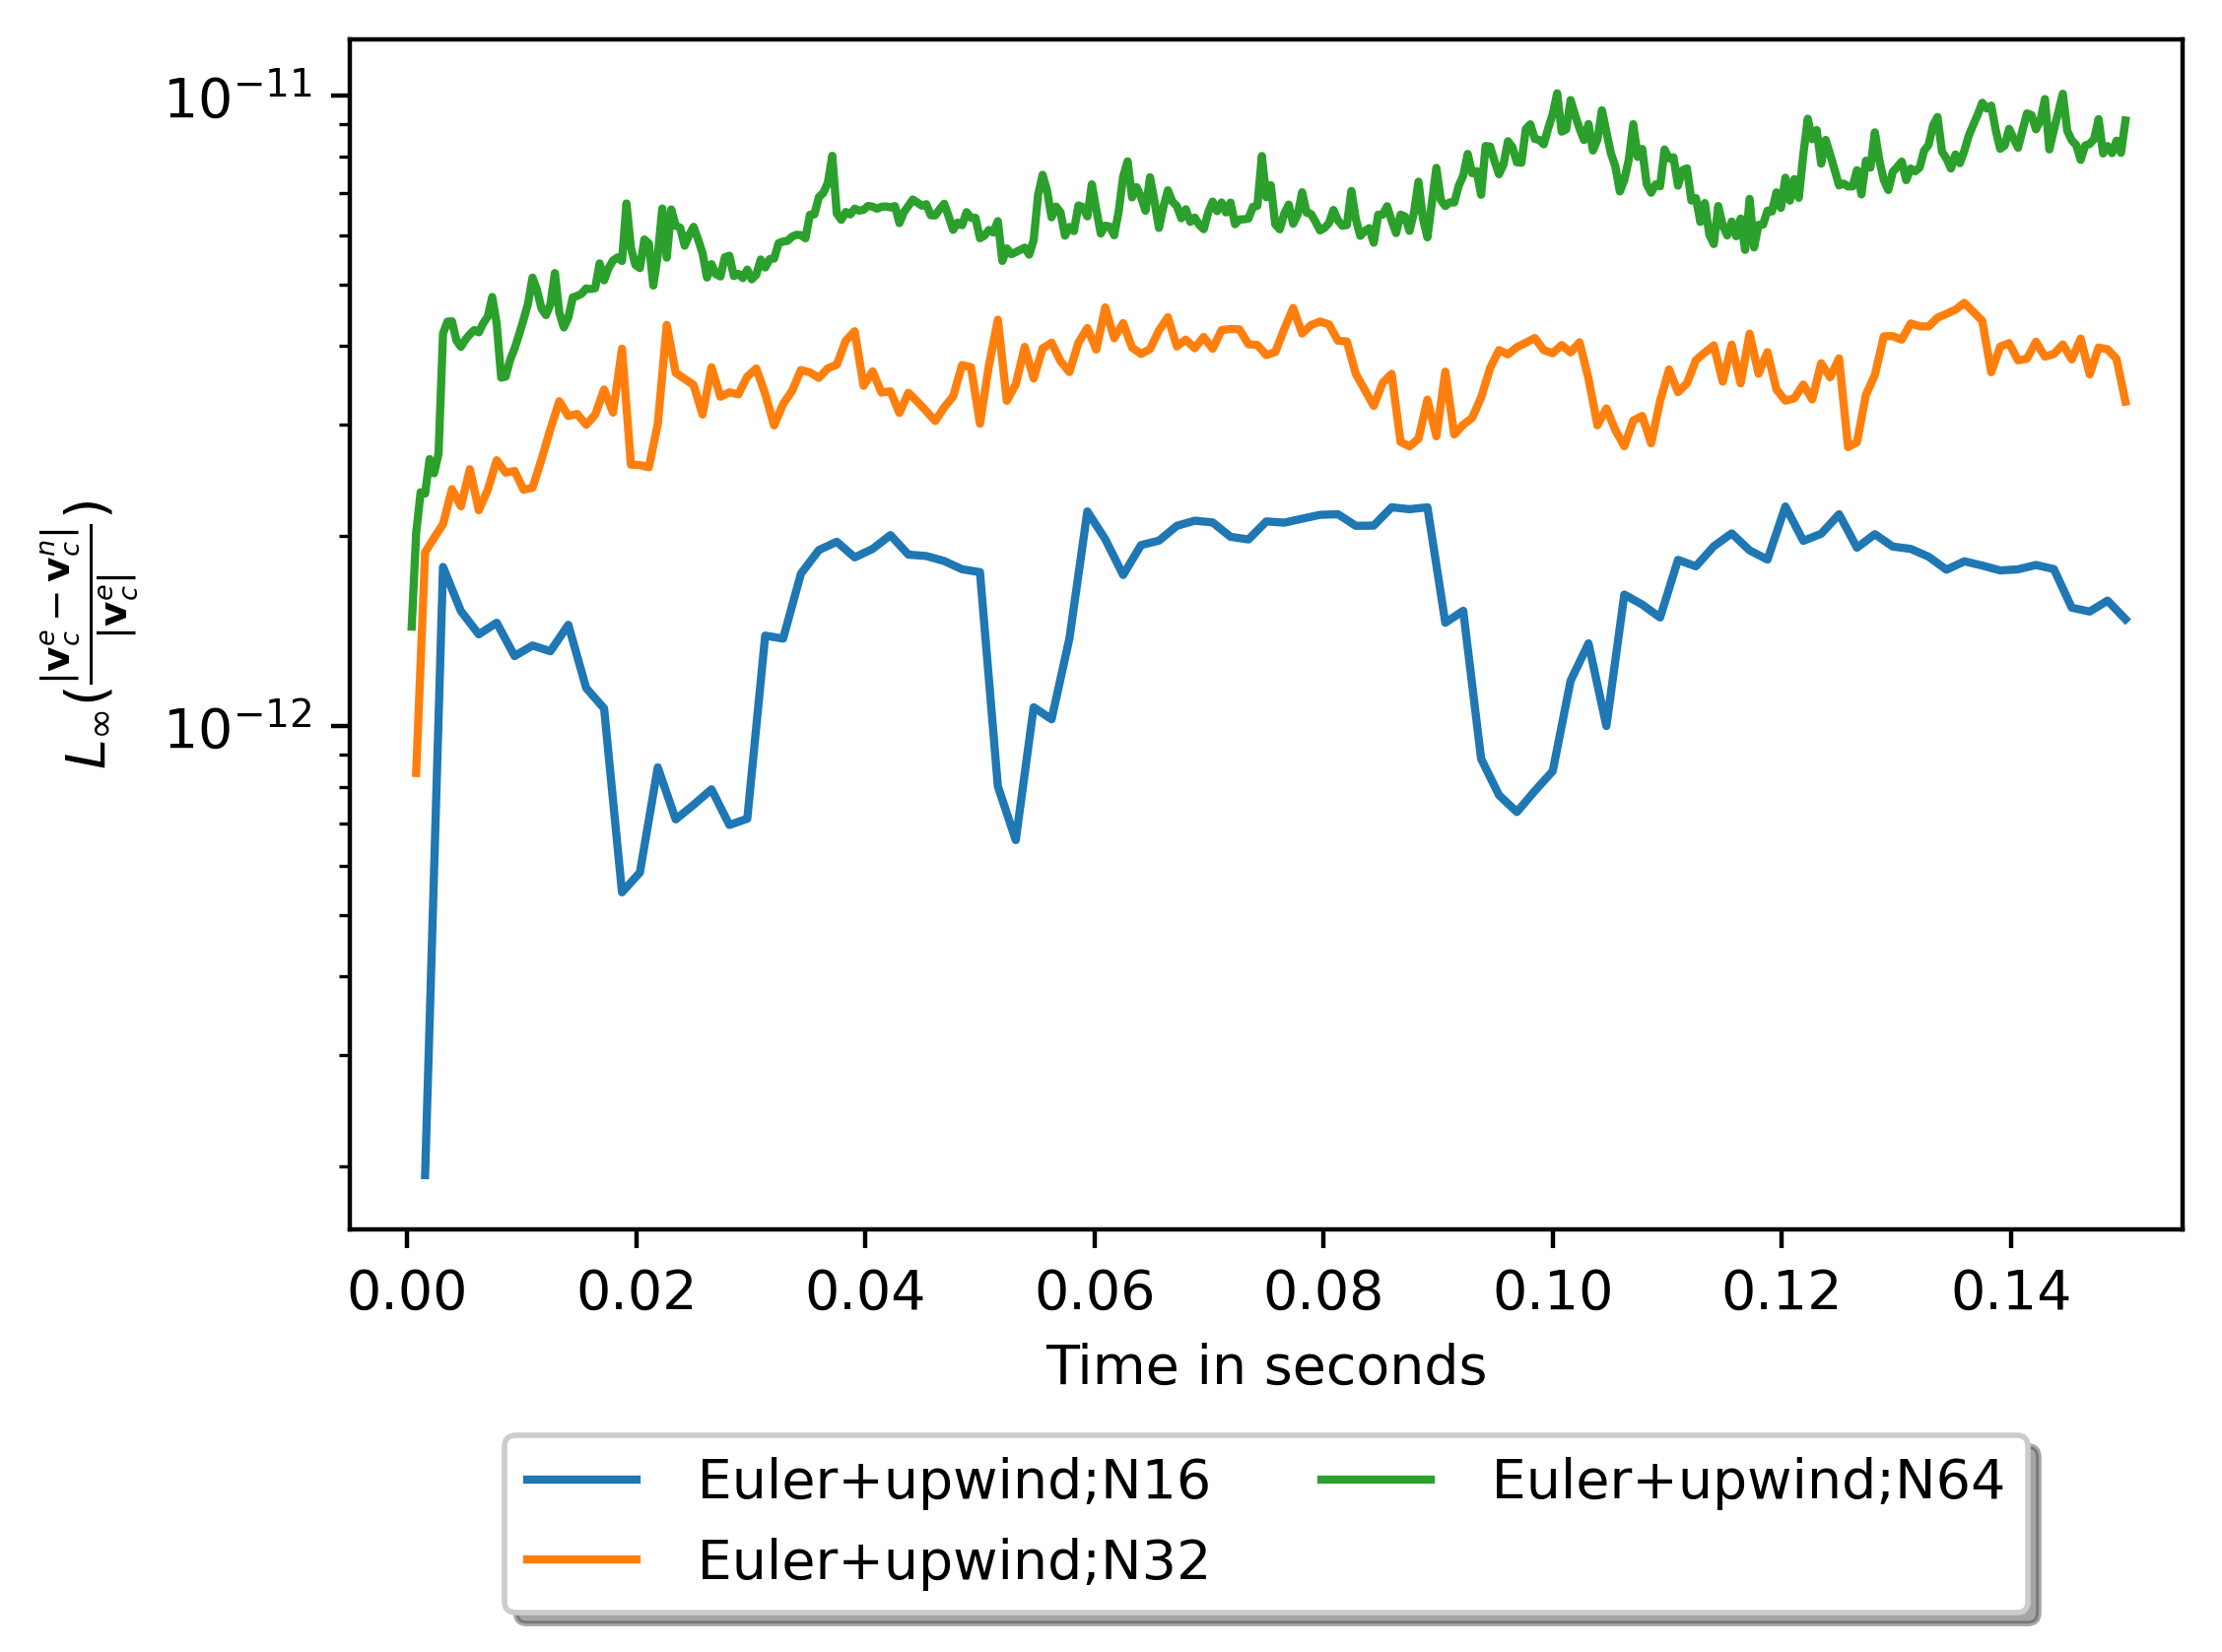

In [4]:
dframe_isoAdv_Euler_upwind = dframe_isoAdv.loc[(dframe_isoAdv.index.get_level_values('timeSchemes') == 'Euler') & (dframe_isoAdv.index.get_level_values('fluxSchemes') == 'upwind')]
plot_density_ratio_dframe(dframe_isoAdv_Euler_upwind)

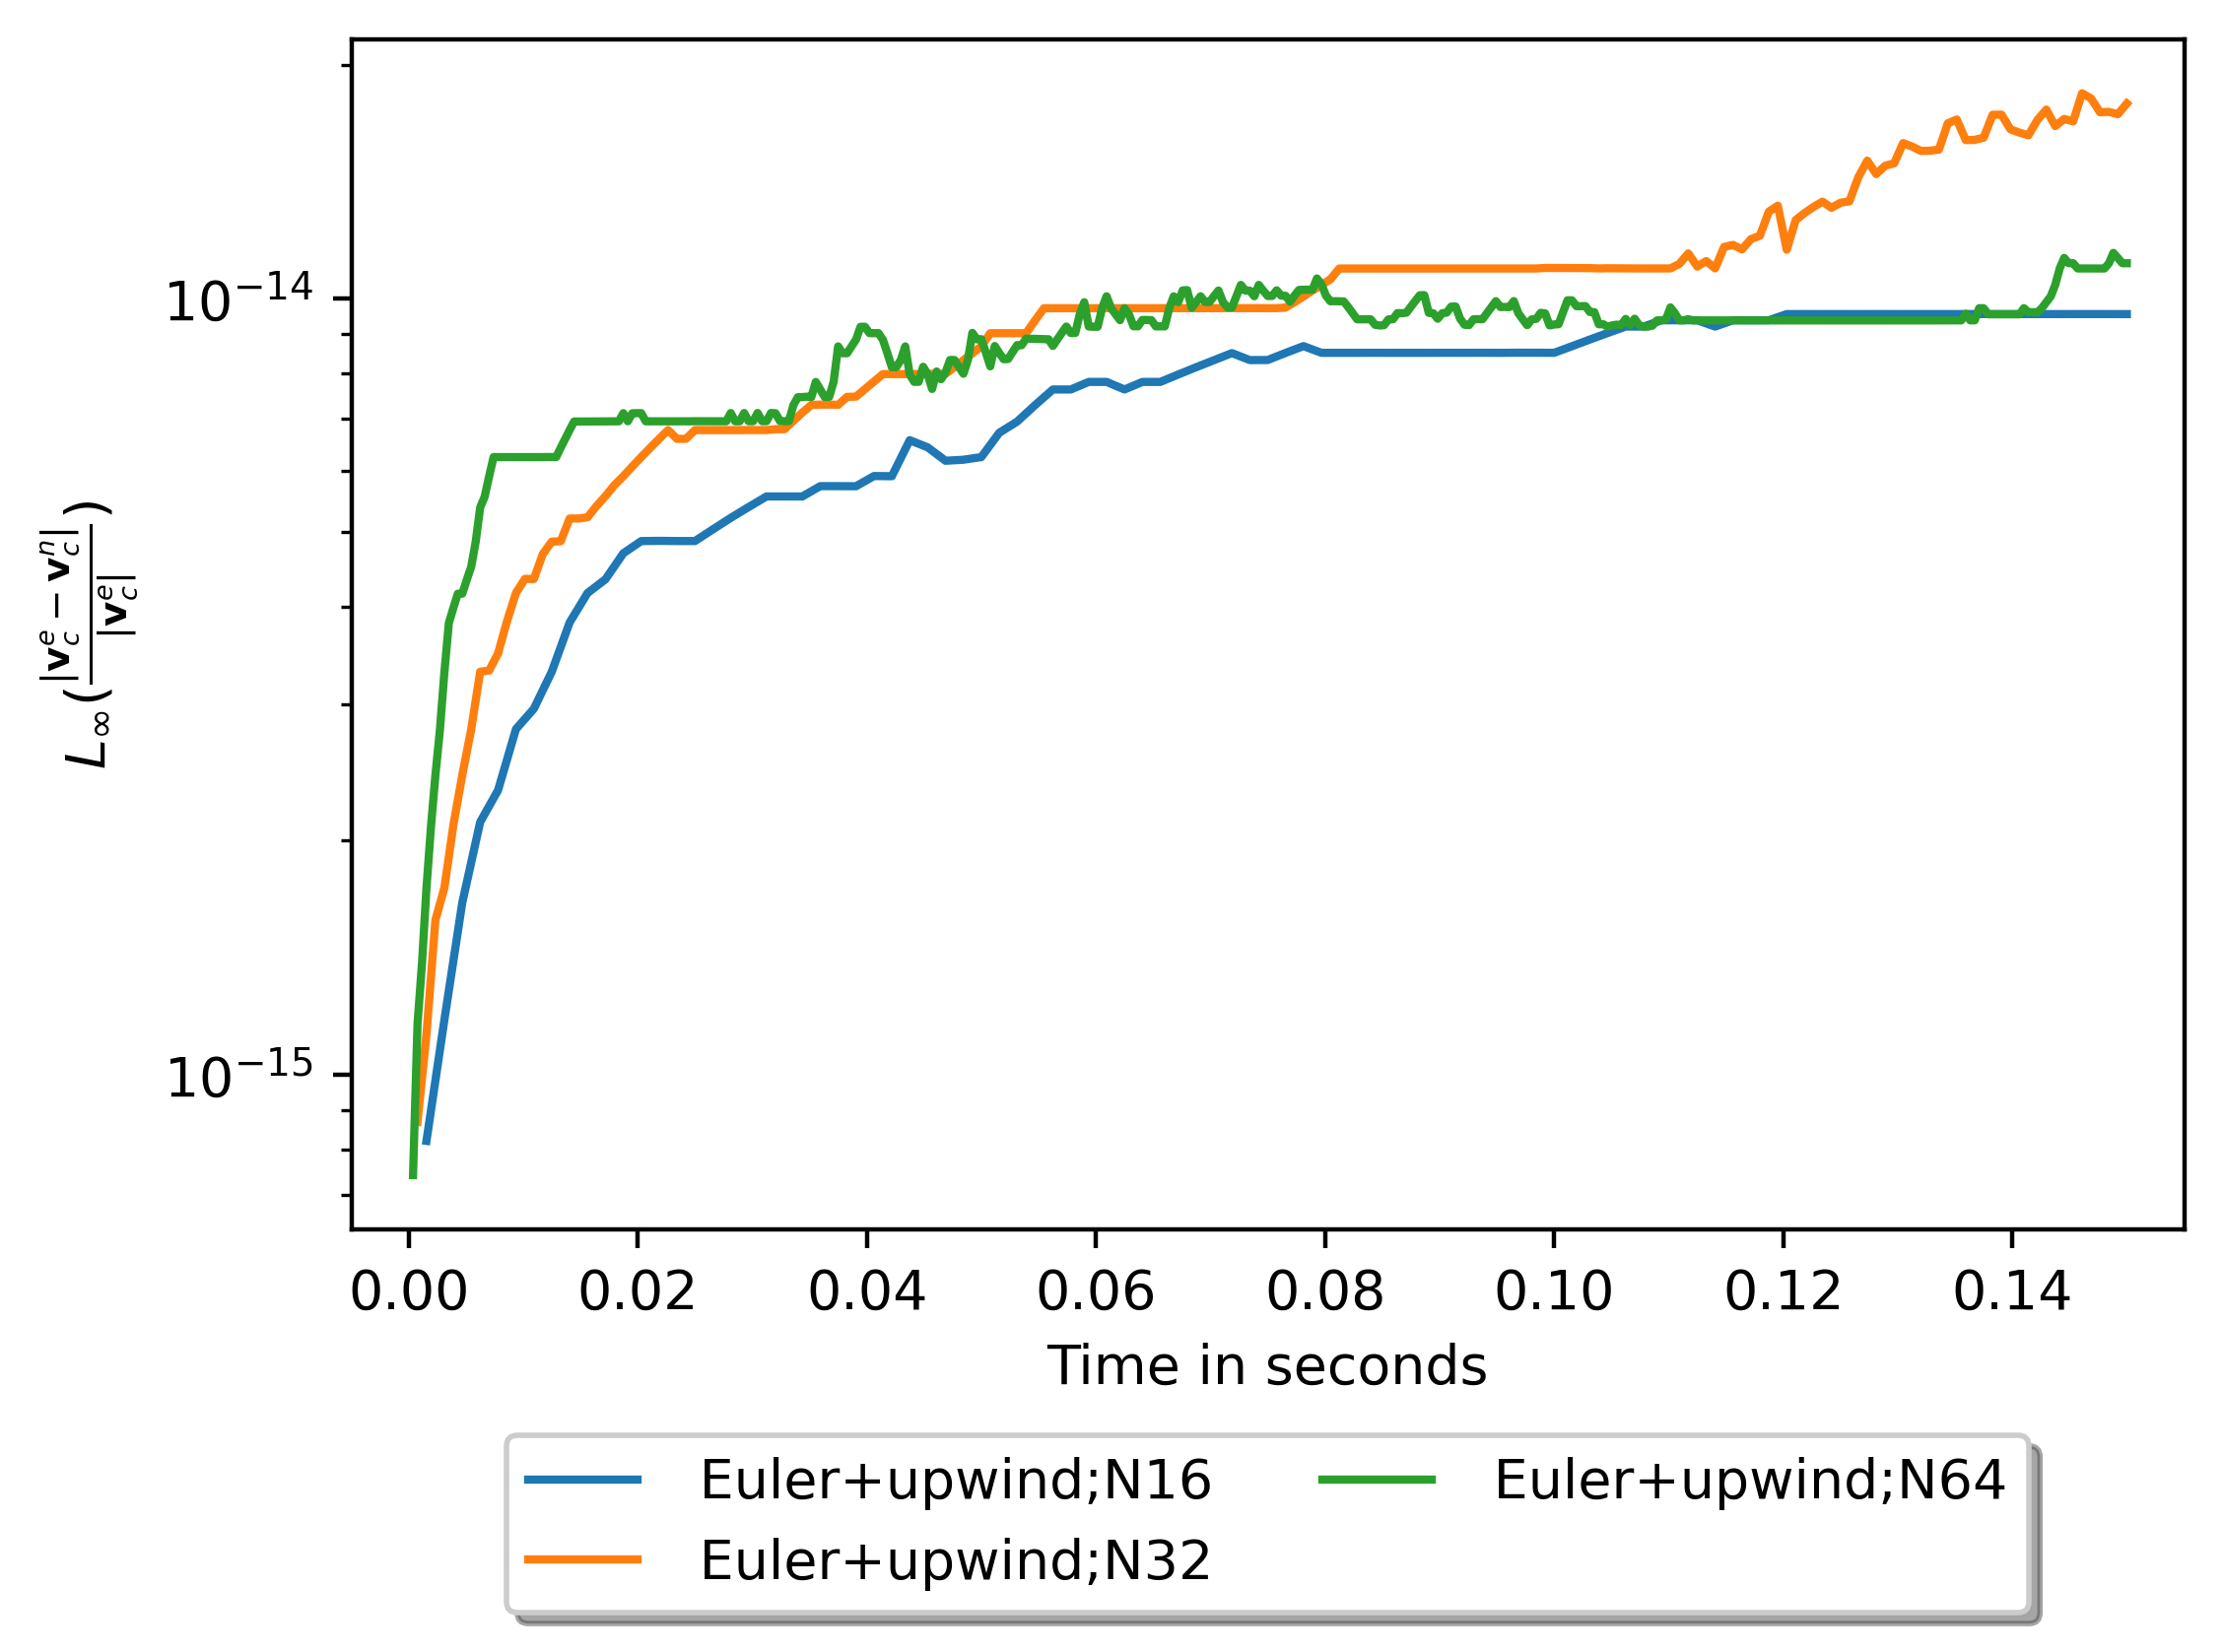

In [8]:
dframe_isoRho_Euler_upwind = dframe_isoRho.loc[(dframe_isoRho.index.get_level_values('timeSchemes') == 'Euler') & (dframe_isoRho.index.get_level_values('fluxSchemes') == 'upwind')]
plot_density_ratio_dframe(dframe_isoRho_Euler_upwind)

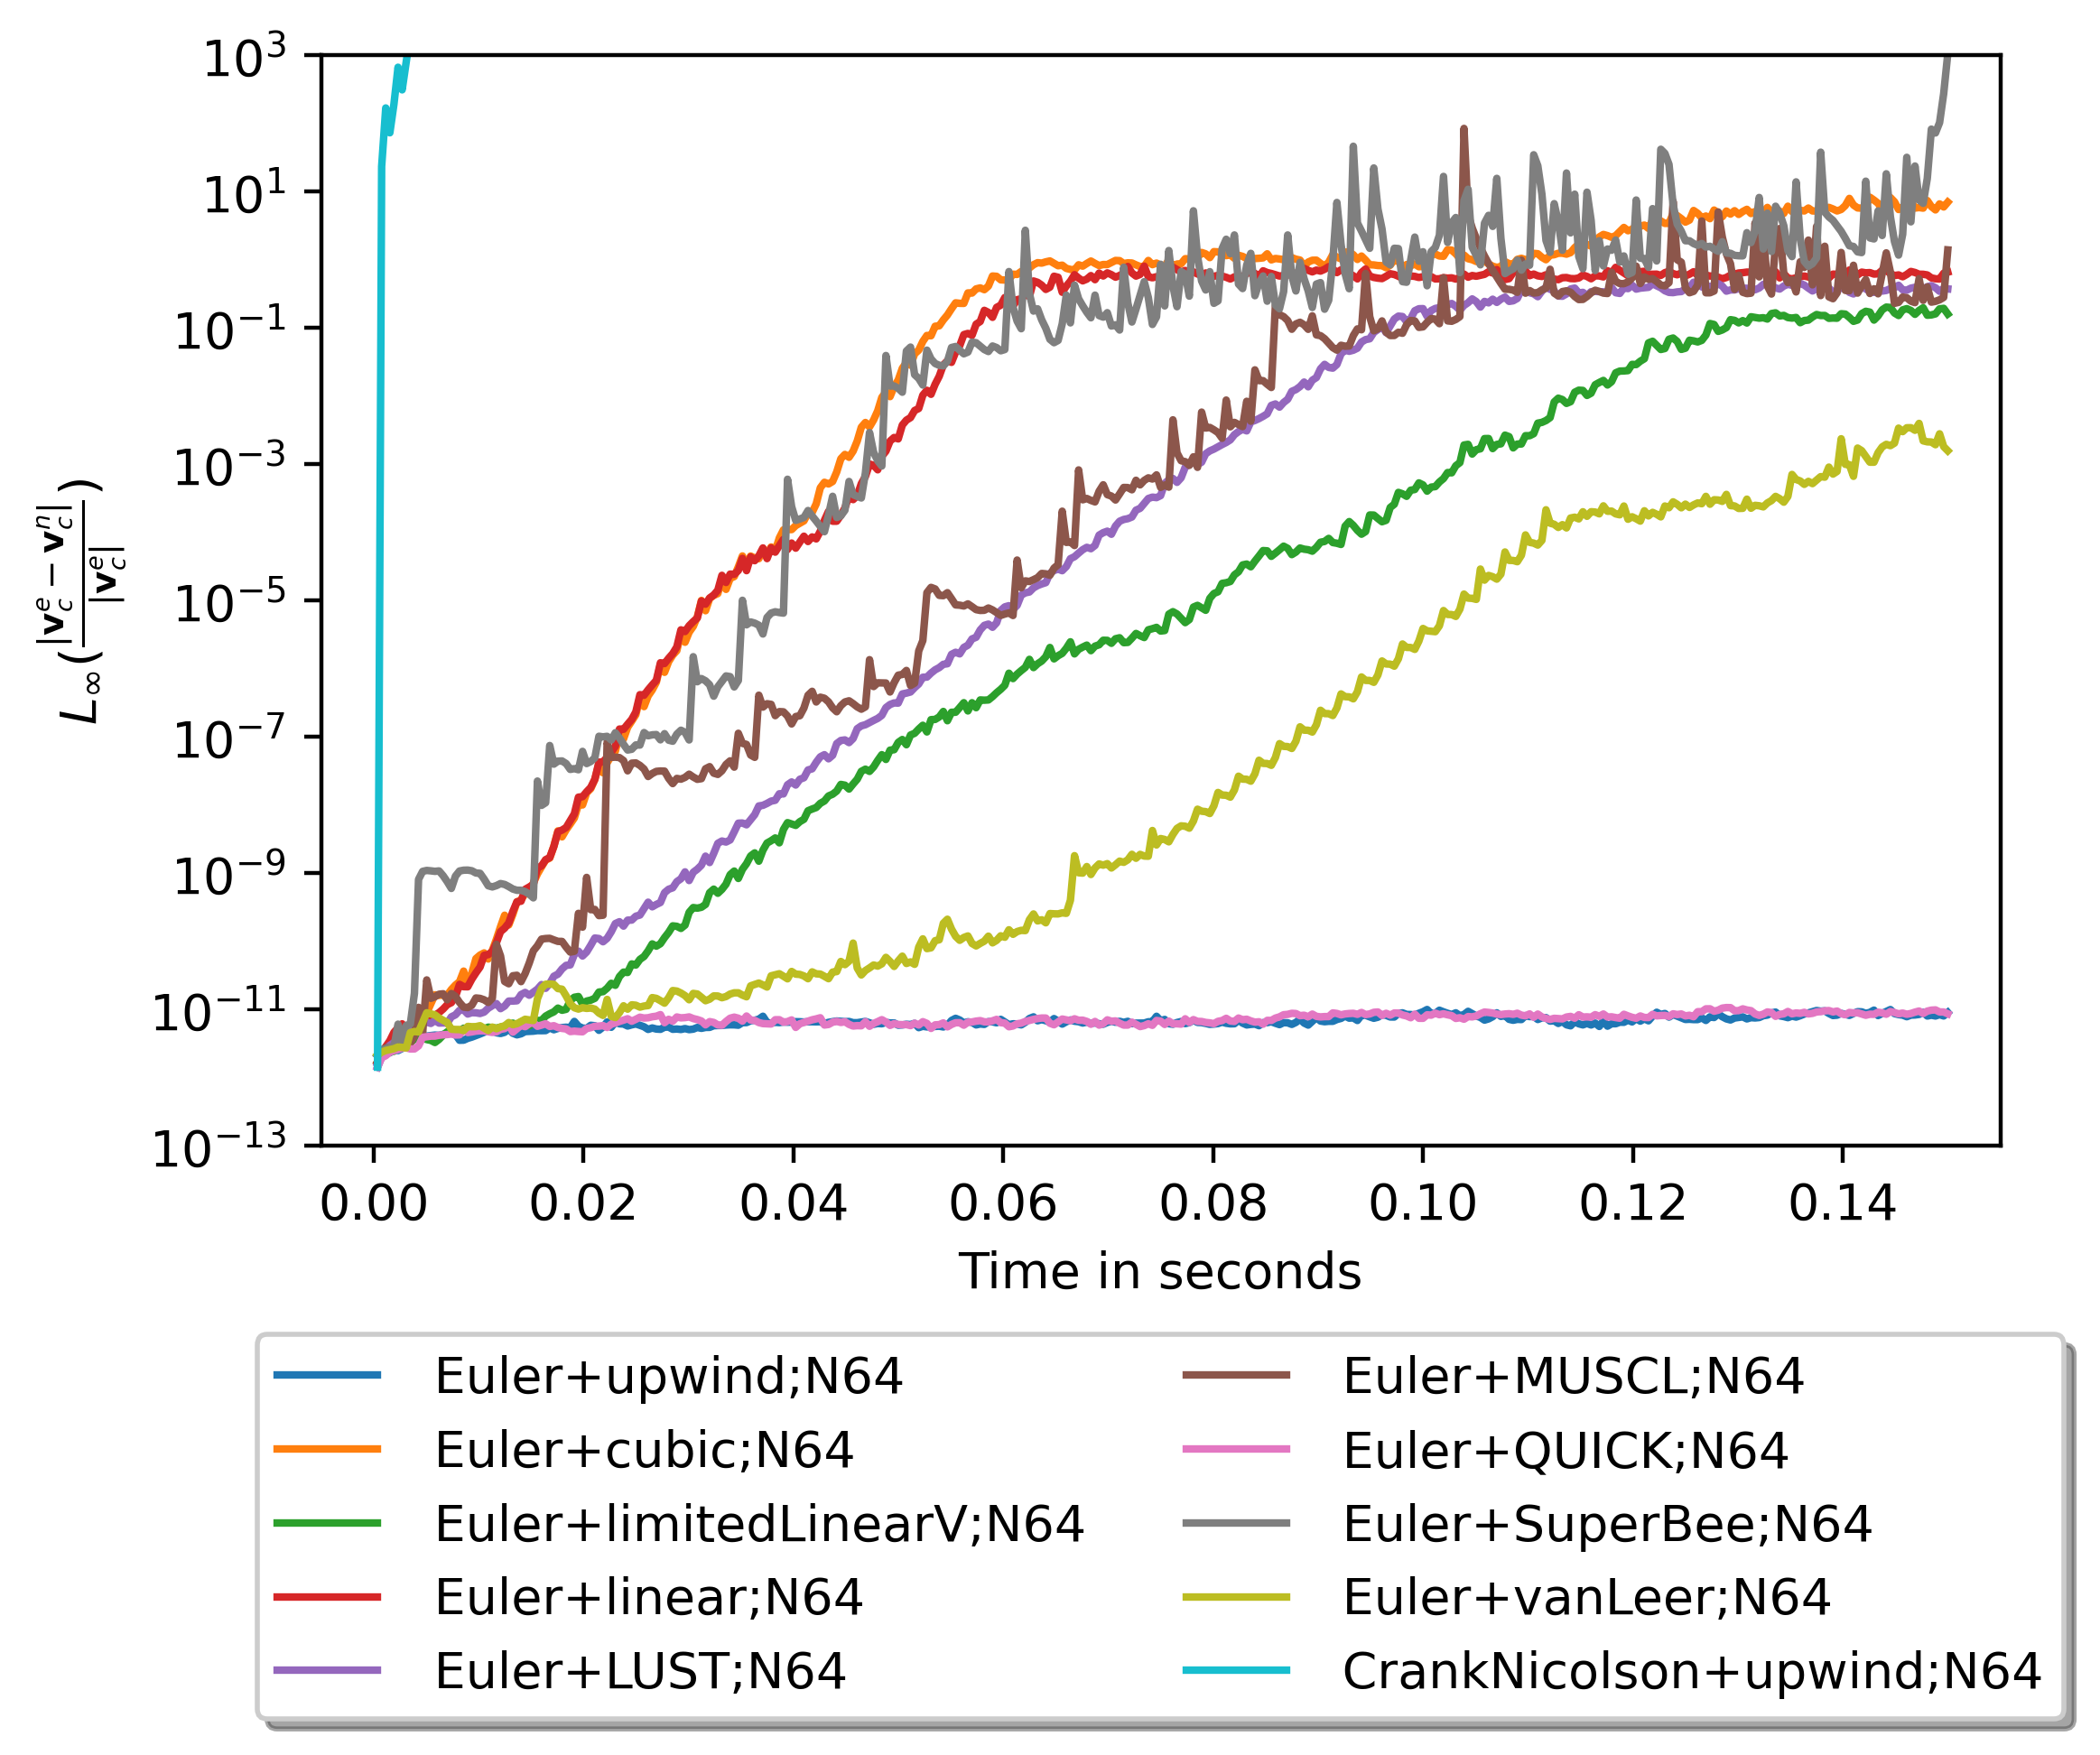

In [6]:
dframe_isoAdv_Euler_N64_CN = dframe_isoAdv.loc[((dframe_isoAdv.index.get_level_values('timeSchemes') == 'Euler') & (dframe_isoAdv.index.get_level_values('resolution') == 64)) 
                                            | ((dframe_isoAdv.index.get_level_values('timeSchemes') == 'CrankNicolson') & (dframe_isoAdv.index.get_level_values('fluxSchemes') == 'upwind')& (dframe_isoAdv.index.get_level_values('resolution') == 64))]                                          

plot_density_ratio_dframe(dframe_isoAdv_Euler_N64_CN)